# Proyek Prediksi Harga Mobil Bekas

In [28]:
# Langkah 1: Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import pickle

In [54]:
# Langkah 2: Memuat Dataset
data_path = 'used_cars.csv'  # Path file dataset
data = pd.read_csv(data_path)

# Menampilkan beberapa baris pertama
print(data.head())


      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

In [18]:
# Langkah 3: Eksplorasi Data
print("Informasi Dataset:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None

Statistik Deskriptif:
        model_year
count  4009.000000
mean   2015.515590
std       6.104816
min    1974.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000


In [22]:
# Langkah 4: Membersihkan Data
## Menghapus simbol "$" dan mengonversi kolom 'price' menjadi numerik
data['price'] = data['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Menghapus satuan "mi." dari kolom 'milage' dan mengonversinya menjadi numerik
data['milage'] = data['milage'].replace({r' mi\.': '', ',': ''}, regex=True).astype(float)

# Menghapus baris dengan missing values
data = data.dropna()

In [23]:
# Langkah 5: Pra-pemrosesan Data
# Mengubah data kategorikal menjadi numerik
categorical_columns = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Normalisasi data numerik
scaler = StandardScaler()
features = data.drop('price', axis=1)  # 'price' adalah kolom target
features_scaled = scaler.fit_transform(features)

In [24]:
# Langkah 6: Membagi Data Menjadi Train dan Test
X = features_scaled
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Langkah 7a: Membangun Model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [36]:
# Langkah 7b: Membangun Model XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Langkah 7c: Membangun Model LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 10
[LightGBM] [Info] Start training from score 40808.491013


LGBMRegressor(random_state=42)

In [38]:
# Langkah 8: Evaluasi Model
# Random Forest
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"\nEvaluasi Model Random Forest:")
print(f"R-squared (R²): {r2_rf}")

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"\nEvaluasi Model XGBoost:")
print(f"R-squared (R²): {r2_xgb}")

# LightGBM
y_pred_lgb = lgb_model.predict(X_test)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f"\nEvaluasi Model LightGBM:")
print(f"R-squared (R²): {r2_lgb}")


Evaluasi Model Random Forest:
R-squared (R²): 0.054089896544960214

Evaluasi Model XGBoost:
R-squared (R²): 0.06270259797314737

Evaluasi Model LightGBM:
R-squared (R²): 0.05434853829884223


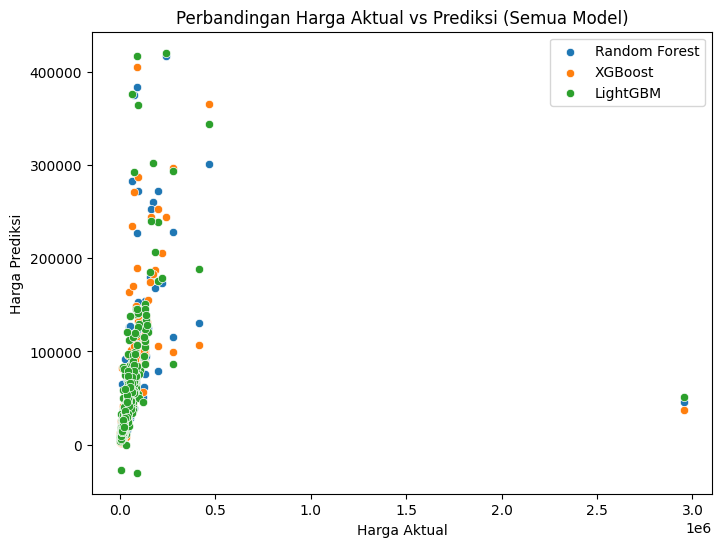

In [31]:
# Langkah 9: Visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest')
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost')
sns.scatterplot(x=y_test, y=y_pred_lgb, label='LightGBM')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Perbandingan Harga Aktual vs Prediksi (Semua Model)')
plt.legend()
plt.show()

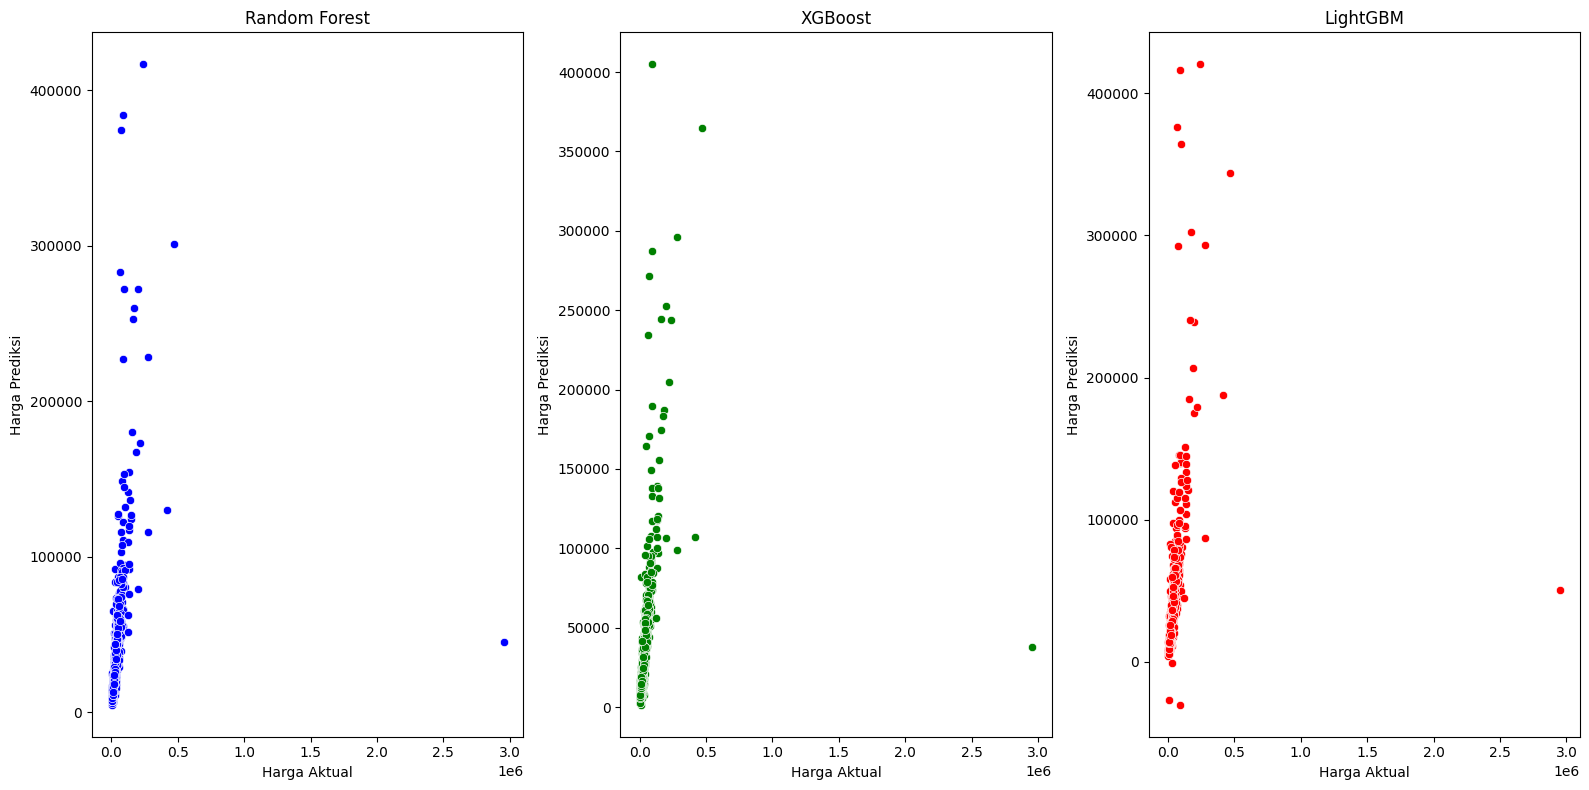

In [40]:
# Langkah 9: Visualisasi Evaluasi Model yang dipisah
plt.figure(figsize=(16, 8))

# Visualisasi untuk Random Forest
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Random Forest')

# Visualisasi untuk XGBoost
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_xgb, color='green')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('XGBoost')

# Visualisasi untuk LightGBM
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lgb, color='red')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('LightGBM')

plt.tight_layout()
plt.show()


In [44]:
# Visualisasi menggunakan Diagram Batang
model_names = ['Random Forest', 'XGBoost', 'LightGBM']
r2_scores = [r2_rf, r2_xgb, r2_lgb]


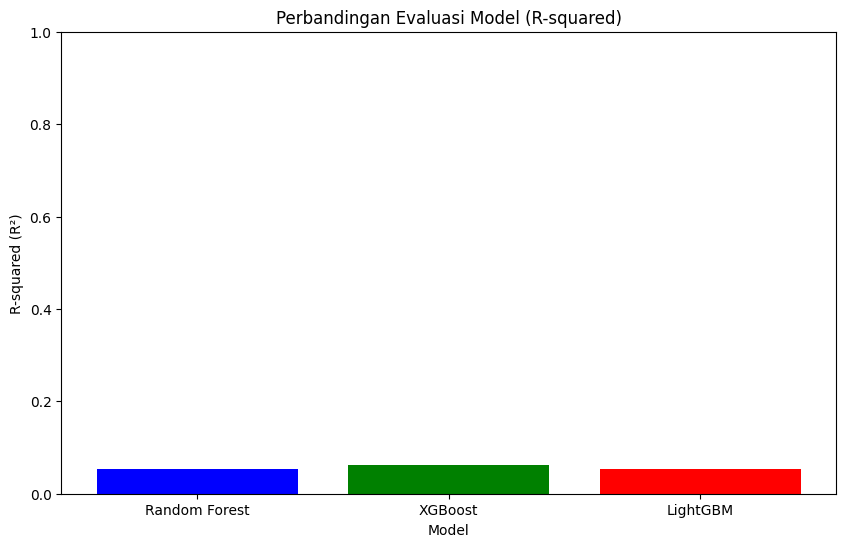

In [45]:
# Visualisasi menggunakan Diagram Batang
model_names = ['Random Forest', 'XGBoost', 'LightGBM']
r2_scores = [r2_rf, r2_xgb, r2_lgb]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R-squared (R²)')
plt.title('Perbandingan Evaluasi Model (R-squared)')
plt.ylim(0, 1)
plt.show()

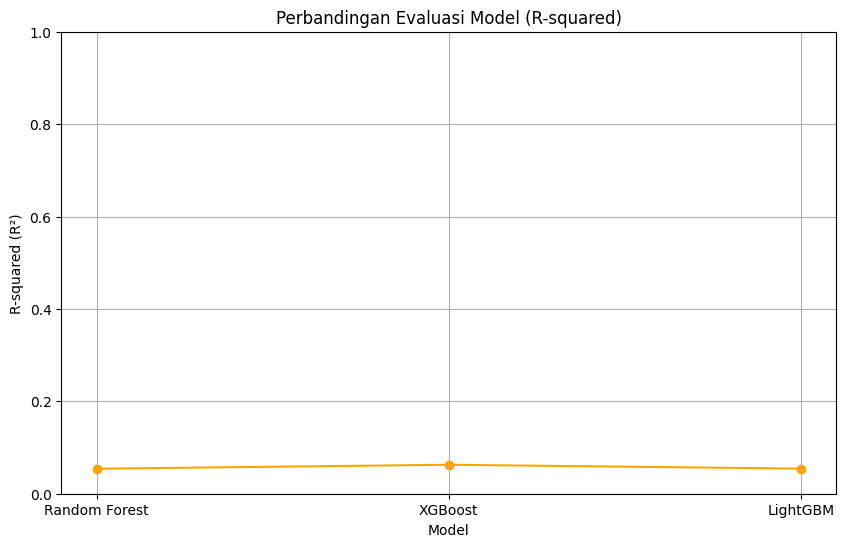

In [55]:
# Visualisasi menggunakan Diagram Garis
plt.figure(figsize=(10, 6))
plt.plot(model_names, r2_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('Model')
plt.ylabel('R-squared (R²)')
plt.title('Perbandingan Evaluasi Model (R-squared)')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [58]:
import os
file_path = 'car_price_model.pkl'
if os.path.exists(file_path):
    print(f"File exists: {file_path}, Size: {os.path.getsize(file_path)} bytes")
else:
    print(f"File does not exist: {file_path}")


File exists: car_price_model.pkl, Size: 35891249 bytes


In [ ]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv('used_cars.csv')
data['milage'] = data['milage'].str.replace(',', '').str.replace(' mi.', '').astype(float)
data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)
data = data.dropna(subset=['brand', 'model', 'model_year', 'price'])

# Prepare features and target
features = ['brand', 'model', 'model_year', 'milage']
target = 'price'
X = data[features]
y = data[target]

# Preprocessing and model pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand', 'model'])
], remainder='passthrough')

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train the model
model.fit(X, y)

# Save the trained model
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been saved as 'car_price_model.pkl'")


In [46]:
# Langkah 10: Menyimpan Model dengan Pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)